In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
from ress.utils import plotVectors

In [75]:
# Plot parameters
sns.set()
# Seven hls color palette
current_palette_7 = sns.color_palette("hls", 7)
sns.set_palette(current_palette_7)

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# rcParams.keys()

Populating the interactive namespace from numpy and matplotlib


In [76]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2.11 The determinant

We saw in [2.8]() that a matrix can be seen as a linear transformation of the space. The determinant of a matrix $\boldsymbol{A}$ is a number corresponding to the *multiplicative change* you get when you transform your space with this matrix (see a comment by Pete L. Clark in [this SE question](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)). A negative determinant means that there is a change in orientation (and not just a rescaling and/or a rotation). As outlined by Nykamp DQ [3], a change in orientation means for instance in 2D that we take a plane out of these 2 dimensions, do some transformations and get back to the originel 2D space. Here is an example helping to distinguish between positive and negative determinant:

<img src="images/rotationVsMirror.png" alt="rotationVsMirror" width="400">

You can see that the second transformation can't be obtained through rotation and rescaling.

The sign can tells you the nature of the transformation. In addition, it also gives you the *amount* of the transformation. If you take the *n*-dimensional unit cube and apply the matrix $\boldsymbol{A}$ on it, the absolute value of the determinant corresponds to the area of the transformed figure. You might believe me more easily after the following example.

### Example 1.

To calculate the area of the shapes, we will use simple squares in 2 dimensions. The unit cube area can be calculated with the Pythagorean theorem taking the unit vectors

<img src="images/unitSquare.png" alt="unitSquare" width="300">


The lengths of $i$ and $j$ are $1$ thus the area of the unit square is $1$.

Let's start by creating both vectors in Python:

(-0.5, 3)

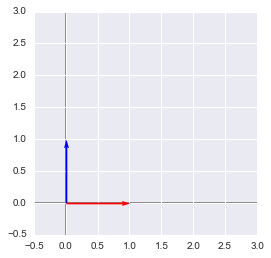

In [78]:
i = [0, 1]
j = [1, 0]

plotVectors([i, j], [['blue'], ['red']])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

We will apply $
\boldsymbol{A}=\begin{bmatrix}
    2 & 0\\\\
    0 & 2
\end{bmatrix}
$ to $i$ and $j$. You can notice that this matrix is special: it is diagonal. So it will only rescale our space without rotations. More precisely, it will rescale each dimension the same way because the diagonal values are identical. Let's create the matrix $\boldsymbol{A}$:

In [79]:
A = np.array([[2, 0], [0, 2]])
A

array([[2, 0],
       [0, 2]])

Now we will apply $\boldsymbol{A}$ on our two unit vectors $i$ and $j$ and plot the resulting new vectors:

(-0.5, 3)

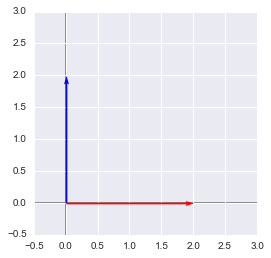

In [80]:
new_i = A.dot(i)
new_j = A.dot(j)
plotVectors([new_i, new_j], [['blue'], ['red']])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

As expected, we see that the square corresponding to $i$ and $j$ didn't rotate but the lengths of $i$ and $j$ have doubled. We will now calculate the determinant of $\boldsymbol{A}$ (you can go to the [Wikipedia article](https://en.wikipedia.org/wiki/Determinant) to see how to calculate the determinant):

<img src="images/unitSquareTrans.png" alt="unitSquareTrans" width="300">

In [81]:
np.linalg.det(A)

4.0

And yes, the transformation have multiplied the area of the unit square by 4. The lengths of $new_i$ and $new_j$ are $2$ (thus $2\cdot2=4$).

### Example 2.

Let's see now an example of negative determinant.

We will transform the unit square with the matrix $\boldsymbol{B}=\begin{bmatrix}
    -2 & 0\\\\
    0 & 2
\end{bmatrix}$. Its determinant is $-4$:

In [82]:
B = np.array([[-2, 0], [0, 2]])
np.linalg.det(B)

-4.0

(-0.5, 3)

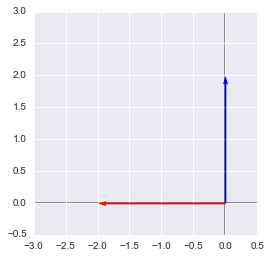

In [83]:
new_i_1 = B.dot(i)
new_j_1 = B.dot(j)
plotVectors([new_i_1, new_j_1], [['blue'], ['red']])
plt.xlim(-3, 0.5)
plt.ylim(-0.5, 3)

<img src="images/unitSquareTrans1.png" alt="unitSquareTrans1" width="300">

The absolute value of the determinant show that as in the first example, the area of the new square is 4 times the area of the unit square. But this time, it was not just a rescaling but also a transformation. It is not obvious with only the unit vectors so let's transform some random points. We will use the matrix $\boldsymbol{C}=\begin{bmatrix}
    -1 & 0\\\\
    0 & 1
\end{bmatrix}$ for simplicity:

In [89]:
# Some random points
points = np.array([[1, 3], [2, 2], [3, 1], [4, 7], [5, 4]])

In [90]:
C = np.array([[-1, 0], [0, 1]])
np.linalg.det(C)

-1.0

Since the determinant is $-1$, the area of the space will not be changed. However, since it is negative we will observe a transformation not possible to obtain through rotation:

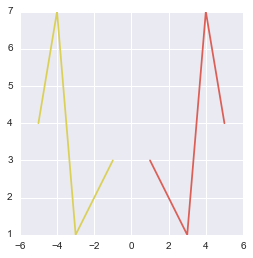

In [91]:
newPoints = x.dot(C)

plt.figure()
plt.plot(points[:, 0], points[:, 1])
plt.plot(newPoints[:, 0], newPoints[:, 1])
plt.show()

You can see that the transformation mirrored the red shape.

# References

[1] [Determinant intuition - SE](https://math.stackexchange.com/questions/668/whats-an-intuitive-way-to-think-about-the-determinant)

[2] [Numpy determinant](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.det.html)

[3] [Nykamp DQ, “Determinants and linear transformations.” From Math Insight](https://mathinsight.org/determinant_linear_transformation)